

The Initial weight before 10,000 epoch iteration:

Initial hidden weights = [0.68827236 0.41605571] [0.37905088 0.45047266]
Initial hidden biases = [0.02897625 0.09386164]
Initial output weights = [0.16093104] [0.75587503]
Initial output biases = [0.17326607]

The final weight after 10,000 epoch iteration:

Final hidden weights: [3.74827036 5.75057038] [3.74293128 5.72563704]
Final hidden bias: [-5.73840611 -2.39530328]
Final output weights: [-8.10207729] [7.49314207]
Final output bias: [-3.38734461]

Final Output from the network after 10,000 epoch iteration: [0.05801241] [0.94670726] [0.94678755] [0.05730357]


ValueError: x and y can be no greater than 2-D, but have shapes (10000,) and (10000, 4, 2)

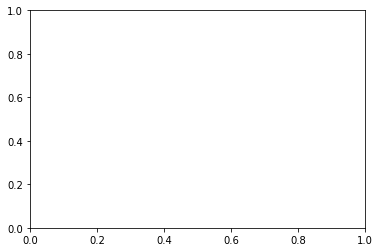

In [46]:
# Computer Network Programming Assignemnt 4
from math import exp
from random import seed
from random import random
import numpy as np
import matplotlib.pyplot as plt

# Initialize our network with 2 hidden layer 
# input layer with 2 node 
#one output layer

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expect_output = np.array([[0],[1],[1],[0]])

input_layer = 2
output_layer = 1
hidden_layer  =2

#giving weight using inbuild
weight_hidden = np.random.uniform(size=(input_layer,hidden_layer))
bias_hidden = np.random.uniform(size=(1,hidden_layer))
output_weights = np.random.uniform(size=(hidden_layer,output_layer))
output_bias = np.random.uniform(size=(1,output_layer))


def creating_network(inputs, hidden, outputs):
    network = list()
    #giving random weight to hidden layer
    hidden_layer = [{'weights':[random() for i in range(inputs + 1)]} for i in range(hidden)]
    #appending it to the network
    network.append(hidden_layer)
    #taking random weight
    output_layer = [{'weights':[random() for i in range(hidden + 1)]} for i in range(outputs)]
    #appending it to the network
    network.append(output_layer)
    return network

def sigmoid (x):
    return 1/(1 + np.exp(-x))

hidden_layer_activation = np.dot(inputs,weight_hidden)
hidden_layer_activation += bias_hidden
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output,output_weights)
output_layer_activation += output_bias
predicted_output = sigmoid(output_layer_activation)

seed(1)
network = creating_network(2, 2, 1)
for layer in network:
    print()
    
def sigmoid_derivation(x):
    return x*(1-x)

#setting epoch and learning rate
epochs = 10000
lr = 0.1

list_input = []
array_output = []
list_error = []

#Printing all the values

print("The Initial weight before 10,000 epoch iteration:")
print()
print("Initial hidden weights = ",end='')
print(*weight_hidden)
print("Initial hidden biases = ",end='')
print(*bias_hidden)
print("Initial output weights = ",end='')
print(*output_weights)
print("Initial output biases = ",end='')
print(*output_bias)


#Forward and Backward Propogation
for i in range(epochs):
    
    #Forward Propagation
    hidden_layer_activation = np.dot(inputs,weight_hidden)
    hidden_layer_activation += bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    #Backward Propagation
    error = expect_output - predicted_output
    d_predicted_output = error * sigmoid_derivation(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivation(hidden_layer_output)

    list_input.append(i)
    list_error.append(error_hidden_layer)
    #list_input.insert(i-1,i)
    #list_error.insert(i-1,error_hidden_layer)
    
    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    weight_hidden += inputs.T.dot(d_hidden_layer) * lr
    bias_hidden += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

print()
print("The final weight after 10,000 epoch iteration:")
print()
print("Final hidden weights: ",end='')
print(*weight_hidden)
print("Final hidden bias: ",end='')
print(*bias_hidden)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print()
print("Final Output from the network after 10,000 epoch iteration: ",end='')
print(*predicted_output)

x = np.array(list_input)
y= np.array(list_error)
    
#plt.plot(list_input,list_error)
plt.plot(x,y)
plt.show